In [129]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes review data from imdb.com
def url_to_review(url):

        page = requests.get(url).text
        soup = BeautifulSoup(page, "lxml")
        text = [p.text for p in soup.find(class_="lister-list").find_all(class_="text show-more__control")]
        print(url)
        return text

# URLs of reviews in scope
urls = ['https://www.imdb.com/title/tt0059026/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0066327/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0133372/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0070395/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0104940/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0058536/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt1544572/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0084701/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0238414/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0170016/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0111070/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0099785/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0319343/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt1430607/reviews?ref_=tt_urv',
       'https://www.imdb.com/title/tt0338348/reviews?ref_=tt_urv',]

# movie names
movies = ['A Charlie Brown Christmas','Santa Claus is Coming to Town','Annabelles Wish','Miracle on 34th Street','The Muppet Christmas Carol',
          'Rudolph the Red Nosed Reindeer','The Search for Santa Paws','The Snowman','Mickey’s Once Upon a Christmas','Dr Seuss’ How the Grinch Stole Christmas',
          'The Santa Clause','Home Alone','Elf','Arthur Christmas','The Polar Express']

In [130]:
reviews = [url_to_review(u) for u in urls]

https://www.imdb.com/title/tt0059026/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0066327/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0133372/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0070395/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0104940/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0058536/reviews?ref_=tt_urv
https://www.imdb.com/title/tt1544572/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0084701/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0238414/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0170016/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0111070/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0099785/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0319343/reviews?ref_=tt_urv
https://www.imdb.com/title/tt1430607/reviews?ref_=tt_urv
https://www.imdb.com/title/tt0338348/reviews?ref_=tt_urv


In [131]:
# Pickle files for later use

# Make a new directory to hold the text files
!mkdir reviews

for i, c in enumerate(movies):
    with open("reviews/" + c + ".txt", "wb") as file:
        pickle.dump(reviews[i], file)

A subdirectory or file reviews already exists.


In [132]:
# Load pickled files
data = {}
for i, c in enumerate(movies):
    with open("reviews/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [133]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['A Charlie Brown Christmas', 'Santa Claus is Coming to Town', 'Annabelles Wish', 'Miracle on 34th Street', 'The Muppet Christmas Carol', 'Rudolph the Red Nosed Reindeer', 'The Search for Santa Paws', 'The Snowman', 'Mickey’s Once Upon a Christmas', 'Dr Seuss’ How the Grinch Stole Christmas', 'The Santa Clause', 'Home Alone', 'Elf', 'Arthur Christmas', 'The Polar Express'])

In [134]:
# More checks
data['A Charlie Brown Christmas'][:1]

["I remember the first time that I saw this cartoon.  I was about 6 or 7 years old, and I was starting to get into the Peanuts comic strips as I was learning how to read.  From the first time I saw it, I knew there was something very different about this animated Christmas special that set it apart from others.  Maybe it was the fact that it actually gave the true meaning of Christmas by having Linus quote Luke 2:8-14.  Maybe it was able to capture charm and whit of the Peanuts comic strip by Charles Schulz. Maybe it was the jazzy background music by Vince Guaraldi.  Maybe it was all the above.  I'm gonna go with the last one.  To this day I still find this Christmas special to be a very touching one."]

In [135]:
#This is Data Cleaning

In [136]:
# Let's take a look at our data again
next(iter(data.keys()))   

'A Charlie Brown Christmas'

In [137]:
# Notice that our dictionary is currently in key: movie, value: list of text format
next(iter(data.values()))

["I remember the first time that I saw this cartoon.  I was about 6 or 7 years old, and I was starting to get into the Peanuts comic strips as I was learning how to read.  From the first time I saw it, I knew there was something very different about this animated Christmas special that set it apart from others.  Maybe it was the fact that it actually gave the true meaning of Christmas by having Linus quote Luke 2:8-14.  Maybe it was able to capture charm and whit of the Peanuts comic strip by Charles Schulz. Maybe it was the jazzy background music by Vince Guaraldi.  Maybe it was all the above.  I'm gonna go with the last one.  To this day I still find this Christmas special to be a very touching one.",
 'It\'s almost Christmas, and the Peanuts gang is eagerly anticipating it\x85 well, except good ol\' Charlie Brown, who just doesn\'t feel quite right about the festivities this year. Oh, he likes presents and sending cards (even though he never receives them, as indicated by the echo i

In [138]:
# We are going to change this to key: movie, value: string format
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

In [139]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [140]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['reviews']
data_df = data_df.sort_index()
data_df

,reviews
A Charlie Brown Christmas,"I remember the first time that I saw this cartoon. I was about 6 or 7 years old, and I was starting to get into the Peanuts comic strips as I was..."
Annabelles Wish,"My mom bought this several years ago on VHS. I had never heard of it, but reluctantly watched it with her. Who knew a cartoon could be a tear- jer..."
Arthur Christmas,"The ""test"" of a film like this is whether you can just let go and enjoy it, or whether you are constantly feeling the presence of the writers or d..."
Dr Seuss’ How the Grinch Stole Christmas,"Well, I finally broke down and went to see it. I was hesitant after reading all the pans here. Egad! It was a great movie! You can't compare i..."
Elf,"This is the kind of Christmas movie you should be watching every 25th of December apart from your usuals. It's a wonderful story, with a strong Wi..."
Home Alone,"Oh, come on, IMDb users. How could this film get only a 6.5? Yes, it's a kid's movie, but I know plenty of adults(not including myself) who loved ..."
Mickey’s Once Upon a Christmas,"This here is an anthology that tells 3 magical stories of Christmas, the first tale tells about Donald Duck's nephews Huey, Duey and Luey who make..."
Miracle on 34th Street,"With all of the comments about this version not being the original acknowledged, this one is still my favorite version of the story.Maybe its beca..."
Rudolph the Red Nosed Reindeer,"There are many Christmas specials and movies involving Christmas. Some are good. Some are average. And some are just plain bad. But Rudolph, the R..."
Santa Claus is Coming to Town,"This is my favorite of all the Rankin/Bass specials (and they are all excellent). Many people get all the ""Animagic"" cartoons confused...so I'll t..."


In [141]:
# Let's take a look at the reviews for A Charlie Brown Christmas
data_df.reviews.loc['A Charlie Brown Christmas']

'I remember the first time that I saw this cartoon.  I was about 6 or 7 years old, and I was starting to get into the Peanuts comic strips as I was learning how to read.  From the first time I saw it, I knew there was something very different about this animated Christmas special that set it apart from others.  Maybe it was the fact that it actually gave the true meaning of Christmas by having Linus quote Luke 2:8-14.  Maybe it was able to capture charm and whit of the Peanuts comic strip by Charles Schulz. Maybe it was the jazzy background music by Vince Guaraldi.  Maybe it was all the above.  I\'m gonna go with the last one.  To this day I still find this Christmas special to be a very touching one. It\'s almost Christmas, and the Peanuts gang is eagerly anticipating it\x85 well, except good ol\' Charlie Brown, who just doesn\'t feel quite right about the festivities this year. Oh, he likes presents and sending cards (even though he never receives them, as indicated by the echo in hi

In [142]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [143]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.reviews.apply(round1))
data_clean

,reviews
A Charlie Brown Christmas,i remember the first time that i saw this cartoon i was about or years old and i was starting to get into the peanuts comic strips as i was lea...
Annabelles Wish,my mom bought this several years ago on vhs i had never heard of it but reluctantly watched it with her who knew a cartoon could be a tear jerker ...
Arthur Christmas,the test of a film like this is whether you can just let go and enjoy it or whether you are constantly feeling the presence of the writers or dire...
Dr Seuss’ How the Grinch Stole Christmas,well i finally broke down and went to see it i was hesitant after reading all the pans here egad it was a great movie you cant compare it to t...
Elf,this is the kind of christmas movie you should be watching every of december apart from your usuals its a wonderful story with a strong will ferr...
Home Alone,oh come on imdb users how could this film get only a yes its a kids movie but i know plenty of adultsnot including myself who loved this film it ...
Mickey’s Once Upon a Christmas,this here is an anthology that tells magical stories of christmas the first tale tells about donald ducks nephews huey duey and luey who make a w...
Miracle on 34th Street,with all of the comments about this version not being the original acknowledged this one is still my favorite version of the storymaybe its becaus...
Rudolph the Red Nosed Reindeer,there are many christmas specials and movies involving christmas some are good some are average and some are just plain bad but rudolph the rednos...
Santa Claus is Coming to Town,this is my favorite of all the rankinbass specials and they are all excellent many people get all the animagic cartoons confusedso ill try to pinp...


In [144]:
# Apply a second round of cleaning
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [145]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.reviews.apply(round2))
data_clean

,reviews
A Charlie Brown Christmas,i remember the first time that i saw this cartoon i was about or years old and i was starting to get into the peanuts comic strips as i was lea...
Annabelles Wish,my mom bought this several years ago on vhs i had never heard of it but reluctantly watched it with her who knew a cartoon could be a tear jerker ...
Arthur Christmas,the test of a film like this is whether you can just let go and enjoy it or whether you are constantly feeling the presence of the writers or dire...
Dr Seuss’ How the Grinch Stole Christmas,well i finally broke down and went to see it i was hesitant after reading all the pans here egad it was a great movie you cant compare it to t...
Elf,this is the kind of christmas movie you should be watching every of december apart from your usuals its a wonderful story with a strong will ferr...
Home Alone,oh come on imdb users how could this film get only a yes its a kids movie but i know plenty of adultsnot including myself who loved this film it ...
Mickey’s Once Upon a Christmas,this here is an anthology that tells magical stories of christmas the first tale tells about donald ducks nephews huey duey and luey who make a w...
Miracle on 34th Street,with all of the comments about this version not being the original acknowledged this one is still my favorite version of the storymaybe its becaus...
Rudolph the Red Nosed Reindeer,there are many christmas specials and movies involving christmas some are good some are average and some are just plain bad but rudolph the rednos...
Santa Claus is Coming to Town,this is my favorite of all the rankinbass specials and they are all excellent many people get all the animagic cartoons confusedso ill try to pinp...


In [146]:
#Organizing the data

In [147]:
# Let's take a look at our dataframe
data_df

,reviews
A Charlie Brown Christmas,"I remember the first time that I saw this cartoon. I was about 6 or 7 years old, and I was starting to get into the Peanuts comic strips as I was..."
Annabelles Wish,"My mom bought this several years ago on VHS. I had never heard of it, but reluctantly watched it with her. Who knew a cartoon could be a tear- jer..."
Arthur Christmas,"The ""test"" of a film like this is whether you can just let go and enjoy it, or whether you are constantly feeling the presence of the writers or d..."
Dr Seuss’ How the Grinch Stole Christmas,"Well, I finally broke down and went to see it. I was hesitant after reading all the pans here. Egad! It was a great movie! You can't compare i..."
Elf,"This is the kind of Christmas movie you should be watching every 25th of December apart from your usuals. It's a wonderful story, with a strong Wi..."
Home Alone,"Oh, come on, IMDb users. How could this film get only a 6.5? Yes, it's a kid's movie, but I know plenty of adults(not including myself) who loved ..."
Mickey’s Once Upon a Christmas,"This here is an anthology that tells 3 magical stories of Christmas, the first tale tells about Donald Duck's nephews Huey, Duey and Luey who make..."
Miracle on 34th Street,"With all of the comments about this version not being the original acknowledged, this one is still my favorite version of the story.Maybe its beca..."
Rudolph the Red Nosed Reindeer,"There are many Christmas specials and movies involving Christmas. Some are good. Some are average. And some are just plain bad. But Rudolph, the R..."
Santa Claus is Coming to Town,"This is my favorite of all the Rankin/Bass specials (and they are all excellent). Many people get all the ""Animagic"" cartoons confused...so I'll t..."


In [148]:
# Let's add the movies's full names as well
full_movienames = ['A Charlie Brown Christmas','Santa Claus is Coming to Town','Annabelles Wish','Miracle on 34th Street','The Muppet Christmas Carol',
          'Rudolph the Red Nosed Reindeer','The Search for Santa Paws','The Snowman','Mickey’s Once Upon a Christmas','Dr Seuss’ How the Grinch Stole Christmas',
          'The Santa Clause','Home Alone','Elf','Arthur Christmas','The Polar Express']

data_df['full_movienames'] = full_movienames
data_df

,reviews,full_movienames
A Charlie Brown Christmas,"I remember the first time that I saw this cartoon. I was about 6 or 7 years old, and I was starting to get into the Peanuts comic strips as I was...",A Charlie Brown Christmas
Annabelles Wish,"My mom bought this several years ago on VHS. I had never heard of it, but reluctantly watched it with her. Who knew a cartoon could be a tear- jer...",Santa Claus is Coming to Town
Arthur Christmas,"The ""test"" of a film like this is whether you can just let go and enjoy it, or whether you are constantly feeling the presence of the writers or d...",Annabelles Wish
Dr Seuss’ How the Grinch Stole Christmas,"Well, I finally broke down and went to see it. I was hesitant after reading all the pans here. Egad! It was a great movie! You can't compare i...",Miracle on 34th Street
Elf,"This is the kind of Christmas movie you should be watching every 25th of December apart from your usuals. It's a wonderful story, with a strong Wi...",The Muppet Christmas Carol
Home Alone,"Oh, come on, IMDb users. How could this film get only a 6.5? Yes, it's a kid's movie, but I know plenty of adults(not including myself) who loved ...",Rudolph the Red Nosed Reindeer
Mickey’s Once Upon a Christmas,"This here is an anthology that tells 3 magical stories of Christmas, the first tale tells about Donald Duck's nephews Huey, Duey and Luey who make...",The Search for Santa Paws
Miracle on 34th Street,"With all of the comments about this version not being the original acknowledged, this one is still my favorite version of the story.Maybe its beca...",The Snowman
Rudolph the Red Nosed Reindeer,"There are many Christmas specials and movies involving Christmas. Some are good. Some are average. And some are just plain bad. But Rudolph, the R...",Mickey’s Once Upon a Christmas
Santa Claus is Coming to Town,"This is my favorite of all the Rankin/Bass specials (and they are all excellent). Many people get all the ""Animagic"" cartoons confused...so I'll t...",Dr Seuss’ How the Grinch Stole Christmas


In [149]:
# Let's pickle it for later use
data_df.to_pickle("corpus1.pkl")

In [150]:
#Document-Term Matrix

In [151]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.reviews)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,aa,aardman,aardmans,abandon,abandoned,abandoning,abandonment,abc,abilities,ability,...,zemeckiss,zemekis,zero,zillions,zoe,zoey,zombies,zone,zones,zooey
A Charlie Brown Christmas,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Annabelles Wish,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Arthur Christmas,0,16,2,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
Dr Seuss’ How the Grinch Stole Christmas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Elf,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,8
Home Alone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mickey’s Once Upon a Christmas,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Miracle on 34th Street,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Rudolph the Red Nosed Reindeer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Santa Claus is Coming to Town,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm1.pkl")

In [153]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean1.pkl')
pickle.dump(cv, open("cv1.pkl", "wb"))

In [154]:
# This is EDA

In [155]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm1.pkl')
data = data.transpose()
data.head()

,A Charlie Brown Christmas,Annabelles Wish,Arthur Christmas,Dr Seuss’ How the Grinch Stole Christmas,Elf,Home Alone,Mickey’s Once Upon a Christmas,Miracle on 34th Street,Rudolph the Red Nosed Reindeer,Santa Claus is Coming to Town,The Muppet Christmas Carol,The Polar Express,The Santa Clause,The Search for Santa Paws,The Snowman
aa,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
aardman,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0
aardmans,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
abandon,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [156]:
# Find the top 30 words on the reviews of each movie
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'A Charlie Brown Christmas': [('christmas', 106),
  ('charlie', 81),
  ('brown', 71),
  ('special', 26),
  ('peanuts', 21),
  ('meaning', 20),
  ('true', 19),
  ('like', 16),
  ('just', 16),
  ('little', 16),
  ('tree', 15),
  ('charles', 15),
  ('holiday', 15),
  ('story', 14),
  ('time', 14),
  ('linus', 14),
  ('snoopy', 13),
  ('gang', 13),
  ('good', 12),
  ('film', 12),
  ('television', 12),
  ('lucy', 12),
  ('cartoon', 11),
  ('kids', 11),
  ('season', 11),
  ('message', 10),
  ('schulz', 10),
  ('right', 10),
  ('specials', 10),
  ('animation', 9)],
 'Annabelles Wish': [('christmas', 24),
  ('annabelle', 19),
  ('movie', 18),
  ('billy', 16),
  ('film', 12),
  ('reindeer', 12),
  ('annabelles', 11),
  ('wish', 10),
  ('watch', 10),
  ('boy', 9),
  ('kids', 9),
  ('children', 9),
  ('voice', 8),
  ('young', 8),
  ('especially', 7),
  ('aunt', 7),
  ('characters', 7),
  ('good', 7),
  ('santas', 7),
  ('character', 6),
  ('great', 6),
  ('like', 6),
  ('just', 6),
  ('thought',

In [157]:
# Print the top 15 words on the reviews of each movie
for movies, top_words in top_dict.items():
    print(movies)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

A Charlie Brown Christmas
christmas, charlie, brown, special, peanuts, meaning, true, like, just, little, tree, charles, holiday, story
---
Annabelles Wish
christmas, annabelle, movie, billy, film, reindeer, annabelles, wish, watch, boy, kids, children, voice, young
---
Arthur Christmas
christmas, arthur, santa, movie, film, story, good, animation, just, really, world, children, great, aardman
---
Dr Seuss’ How the Grinch Stole Christmas
christmas, movie, grinch, carrey, film, jim, just, really, good, time, did, great, whoville, heart
---
Elf
elf, christmas, film, movie, ferrell, buddy, just, caan, watch, great, santa, funny, james, good
---
Home Alone
film, home, kevin, christmas, movie, family, like, house, john, time, culkin, pesci, good, stern
---
Mickey’s Once Upon a Christmas
christmas, movie, disney, mickey, scrooge, goofy, day, stories, santa, max, minnie, story, donald, mickeys
---
Miracle on 34th Street
version, good, cabot, movie, original, santa, like, david, film, tv, seba

In [158]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

words = []
for movies in data.columns:
    top = [word for (word, count) in top_dict[movies]]
    for t in top:
        words.append(t)
        
words

['christmas',
 'charlie',
 'brown',
 'special',
 'peanuts',
 'meaning',
 'true',
 'like',
 'just',
 'little',
 'tree',
 'charles',
 'holiday',
 'story',
 'time',
 'linus',
 'snoopy',
 'gang',
 'good',
 'film',
 'television',
 'lucy',
 'cartoon',
 'kids',
 'season',
 'message',
 'schulz',
 'right',
 'specials',
 'animation',
 'christmas',
 'annabelle',
 'movie',
 'billy',
 'film',
 'reindeer',
 'annabelles',
 'wish',
 'watch',
 'boy',
 'kids',
 'children',
 'voice',
 'young',
 'especially',
 'aunt',
 'characters',
 'good',
 'santas',
 'character',
 'great',
 'like',
 'just',
 'thought',
 'really',
 'animals',
 'people',
 'cow',
 'animation',
 'mute',
 'christmas',
 'arthur',
 'santa',
 'movie',
 'film',
 'story',
 'good',
 'animation',
 'just',
 'really',
 'world',
 'children',
 'great',
 'aardman',
 'characters',
 'family',
 'old',
 'best',
 'like',
 'hugh',
 'santas',
 'steve',
 'time',
 'mcavoy',
 'fun',
 'laurie',
 'little',
 'james',
 'elf',
 'mission',
 'christmas',
 'movie',
 'gr

In [159]:
# Let's aggregate this list and identify the most common words along with how many reviews they occur in
Counter(words).most_common()

[('christmas', 15),
 ('like', 15),
 ('just', 14),
 ('film', 13),
 ('good', 12),
 ('movie', 12),
 ('story', 10),
 ('santa', 10),
 ('time', 9),
 ('great', 9),
 ('really', 8),
 ('little', 7),
 ('watch', 7),
 ('animation', 6),
 ('family', 6),
 ('holiday', 5),
 ('characters', 5),
 ('best', 5),
 ('classic', 5),
 ('special', 4),
 ('kids', 4),
 ('children', 4),
 ('movies', 4),
 ('boy', 3),
 ('character', 3),
 ('old', 3),
 ('fun', 3),
 ('james', 3),
 ('elf', 3),
 ('did', 3),
 ('original', 3),
 ('think', 3),
 ('funny', 3),
 ('pole', 3),
 ('north', 3),
 ('claus', 3),
 ('toys', 3),
 ('song', 3),
 ('love', 3),
 ('songs', 3),
 ('year', 3),
 ('charlie', 2),
 ('charles', 2),
 ('cartoon', 2),
 ('specials', 2),
 ('reindeer', 2),
 ('wish', 2),
 ('voice', 2),
 ('santas', 2),
 ('book', 2),
 ('films', 2),
 ('child', 2),
 ('mickey', 2),
 ('scrooge', 2),
 ('son', 2),
 ('version', 2),
 ('kris', 2),
 ('does', 2),
 ('rudolph', 2),
 ('snowman', 2),
 ('dont', 2),
 ('make', 2),
 ('life', 2),
 ('brown', 1),
 ('peanu

In [160]:
# If more than half of the reviews have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 7]
add_stop_words

['christmas',
 'like',
 'just',
 'film',
 'good',
 'movie',
 'story',
 'santa',
 'time',
 'great',
 'really']

In [161]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean1.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.reviews)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop1.pkl", "wb"))
data_stop.to_pickle("dtm_stop1.pkl")

In [162]:
# Let's make some word clouds!
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

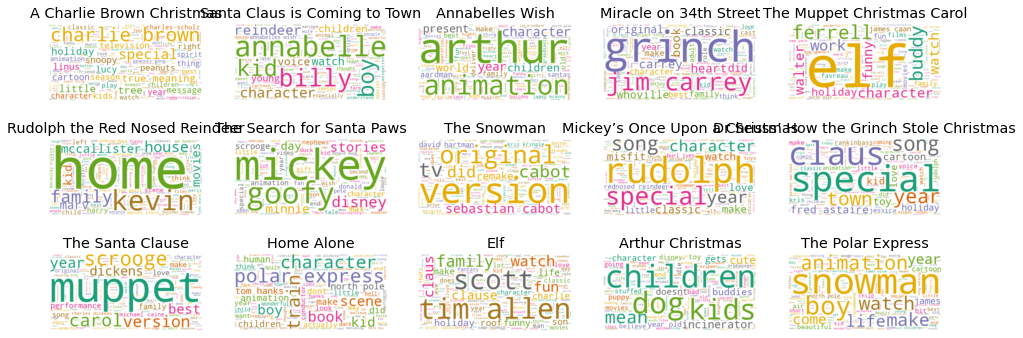

In [164]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_movienames = ['A Charlie Brown Christmas','Santa Claus is Coming to Town','Annabelles Wish','Miracle on 34th Street','The Muppet Christmas Carol',
      'Rudolph the Red Nosed Reindeer','The Search for Santa Paws','The Snowman','Mickey’s Once Upon a Christmas','Dr Seuss’ How the Grinch Stole Christmas',
      'The Santa Clause','Home Alone','Elf','Arthur Christmas','The Polar Express']

# Create subplots for each movie
for index, movies in enumerate(data.columns):
    wc.generate(data_clean.reviews[movies])
    
    plt.subplot(3, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_movienames[index])
    
plt.show()

In [165]:
# This is Sentiment Analysis

In [177]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus1.pkl')
data

,reviews,full_movienames
A Charlie Brown Christmas,"I remember the first time that I saw this cartoon. I was about 6 or 7 years old, and I was starting to get into the Peanuts comic strips as I was...",A Charlie Brown Christmas
Annabelles Wish,"My mom bought this several years ago on VHS. I had never heard of it, but reluctantly watched it with her. Who knew a cartoon could be a tear- jer...",Santa Claus is Coming to Town
Arthur Christmas,"The ""test"" of a film like this is whether you can just let go and enjoy it, or whether you are constantly feeling the presence of the writers or d...",Annabelles Wish
Dr Seuss’ How the Grinch Stole Christmas,"Well, I finally broke down and went to see it. I was hesitant after reading all the pans here. Egad! It was a great movie! You can't compare i...",Miracle on 34th Street
Elf,"This is the kind of Christmas movie you should be watching every 25th of December apart from your usuals. It's a wonderful story, with a strong Wi...",The Muppet Christmas Carol
Home Alone,"Oh, come on, IMDb users. How could this film get only a 6.5? Yes, it's a kid's movie, but I know plenty of adults(not including myself) who loved ...",Rudolph the Red Nosed Reindeer
Mickey’s Once Upon a Christmas,"This here is an anthology that tells 3 magical stories of Christmas, the first tale tells about Donald Duck's nephews Huey, Duey and Luey who make...",The Search for Santa Paws
Miracle on 34th Street,"With all of the comments about this version not being the original acknowledged, this one is still my favorite version of the story.Maybe its beca...",The Snowman
Rudolph the Red Nosed Reindeer,"There are many Christmas specials and movies involving Christmas. Some are good. Some are average. And some are just plain bad. But Rudolph, the R...",Mickey’s Once Upon a Christmas
Santa Claus is Coming to Town,"This is my favorite of all the Rankin/Bass specials (and they are all excellent). Many people get all the ""Animagic"" cartoons confused...so I'll t...",Dr Seuss’ How the Grinch Stole Christmas


In [178]:
# Create quick lambda functions to find the polarity and subjectivity of each movie's reviews
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['reviews'].apply(pol)
data['subjectivity'] = data['reviews'].apply(sub)
data

,reviews,full_movienames,polarity,subjectivity
A Charlie Brown Christmas,"I remember the first time that I saw this cartoon. I was about 6 or 7 years old, and I was starting to get into the Peanuts comic strips as I was...",A Charlie Brown Christmas,0.216999,0.525074
Annabelles Wish,"My mom bought this several years ago on VHS. I had never heard of it, but reluctantly watched it with her. Who knew a cartoon could be a tear- jer...",Santa Claus is Coming to Town,0.219498,0.536814
Arthur Christmas,"The ""test"" of a film like this is whether you can just let go and enjoy it, or whether you are constantly feeling the presence of the writers or d...",Annabelles Wish,0.229509,0.523834
Dr Seuss’ How the Grinch Stole Christmas,"Well, I finally broke down and went to see it. I was hesitant after reading all the pans here. Egad! It was a great movie! You can't compare i...",Miracle on 34th Street,0.240877,0.548090
Elf,"This is the kind of Christmas movie you should be watching every 25th of December apart from your usuals. It's a wonderful story, with a strong Wi...",The Muppet Christmas Carol,0.221977,0.554917
Home Alone,"Oh, come on, IMDb users. How could this film get only a 6.5? Yes, it's a kid's movie, but I know plenty of adults(not including myself) who loved ...",Rudolph the Red Nosed Reindeer,0.204141,0.557725
Mickey’s Once Upon a Christmas,"This here is an anthology that tells 3 magical stories of Christmas, the first tale tells about Donald Duck's nephews Huey, Duey and Luey who make...",The Search for Santa Paws,0.220980,0.558612
Miracle on 34th Street,"With all of the comments about this version not being the original acknowledged, this one is still my favorite version of the story.Maybe its beca...",The Snowman,0.211076,0.523410
Rudolph the Red Nosed Reindeer,"There are many Christmas specials and movies involving Christmas. Some are good. Some are average. And some are just plain bad. But Rudolph, the R...",Mickey’s Once Upon a Christmas,0.227746,0.534001
Santa Claus is Coming to Town,"This is my favorite of all the Rankin/Bass specials (and they are all excellent). Many people get all the ""Animagic"" cartoons confused...so I'll t...",Dr Seuss’ How the Grinch Stole Christmas,0.209451,0.548959


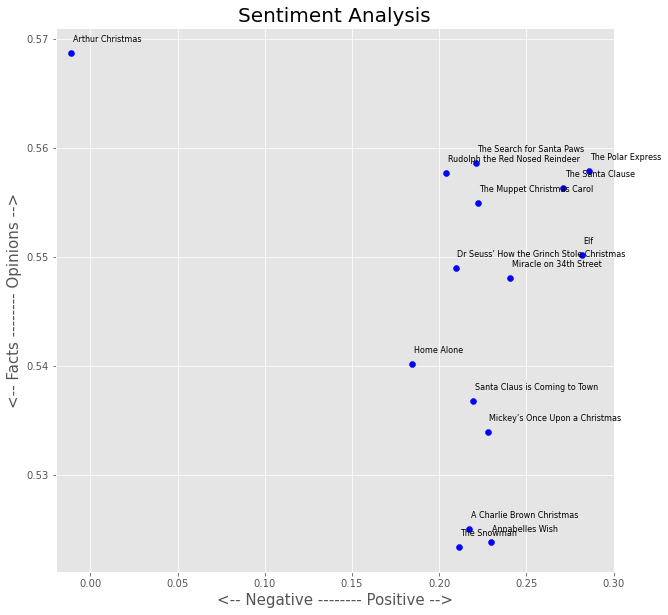

In [179]:
# Let's plot the results
# Scatter plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

for index, movies in enumerate(data.index):
    x = data.polarity.loc[movies]
    y = data.subjectivity.loc[movies]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_movienames'][index], fontsize=8)
    plt.xlim(-.02, .30) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [180]:
# bar plot

In [181]:
import pandas as pd

full_movienames = ['A Charlie Brown Christmas','Santa Claus is Coming to Town','Annabelles Wish','Miracle on 34th Street','The Muppet Christmas Carol',
          'Rudolph the Red Nosed Reindeer','The Search for Santa Paws','The Snowman','Mickey’s Once Upon a Christmas','Dr Seuss’ How the Grinch Stole Christmas',
          'The Santa Clause','Home Alone','Elf','Arthur Christmas','The Polar Express']
polarity1 = [0.216999,0.219498,0.229509,0.240877,0.221977,0.204141,0.220980,0.211076,0.227746,0.209451,0.271193,0.184449,0.281831,-0.011099,0.285654]

data_dict1 = {'movie names': pd.Series(full_movienames), 'polarity': pd.Series(polarity1)}
dframe1 = pd.DataFrame(data_dict1)

dframe1

,movie names,polarity
0,A Charlie Brown Christmas,0.216999
1,Santa Claus is Coming to Town,0.219498
2,Annabelles Wish,0.229509
3,Miracle on 34th Street,0.240877
4,The Muppet Christmas Carol,0.221977
5,Rudolph the Red Nosed Reindeer,0.204141
6,The Search for Santa Paws,0.220980
7,The Snowman,0.211076
8,Mickey’s Once Upon a Christmas,0.227746
9,Dr Seuss’ How the Grinch Stole Christmas,0.209451


In [182]:
dframe1.index

RangeIndex(start=0, stop=15, step=1)

In [183]:
dframe1.columns

Index(['movie names', 'polarity'], dtype='object')

In [184]:
#subjectivity1 = [0.525074,0.536814,0.523834,0.548090,0.554917,0.557725,0.558612,0.523410,0.534001,0.548959,0.556311,0.540178,0.550189,0.568709,0.557875]

In [185]:
#dframe1['subjectivity'] = pd.Series(subjectivity1)
#dframe1

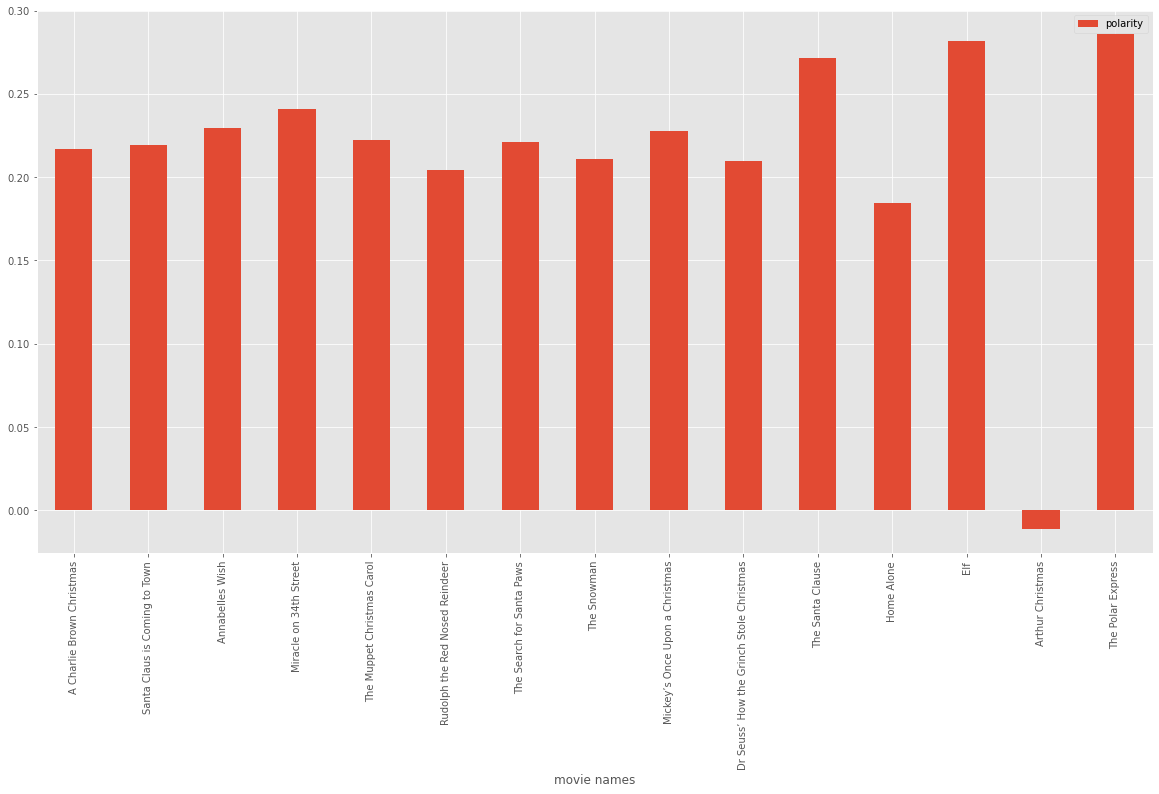

In [186]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)

dframe1.plot.bar(x='movie names',y='polarity')

In [187]:
#Sentiment of reviews

In [188]:
# Split each review into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [189]:
# Let's take a look at our data again
data

,reviews,full_movienames,polarity,subjectivity
A Charlie Brown Christmas,"I remember the first time that I saw this cartoon. I was about 6 or 7 years old, and I was starting to get into the Peanuts comic strips as I was...",A Charlie Brown Christmas,0.216999,0.525074
Annabelles Wish,"My mom bought this several years ago on VHS. I had never heard of it, but reluctantly watched it with her. Who knew a cartoon could be a tear- jer...",Santa Claus is Coming to Town,0.219498,0.536814
Arthur Christmas,"The ""test"" of a film like this is whether you can just let go and enjoy it, or whether you are constantly feeling the presence of the writers or d...",Annabelles Wish,0.229509,0.523834
Dr Seuss’ How the Grinch Stole Christmas,"Well, I finally broke down and went to see it. I was hesitant after reading all the pans here. Egad! It was a great movie! You can't compare i...",Miracle on 34th Street,0.240877,0.548090
Elf,"This is the kind of Christmas movie you should be watching every 25th of December apart from your usuals. It's a wonderful story, with a strong Wi...",The Muppet Christmas Carol,0.221977,0.554917
Home Alone,"Oh, come on, IMDb users. How could this film get only a 6.5? Yes, it's a kid's movie, but I know plenty of adults(not including myself) who loved ...",Rudolph the Red Nosed Reindeer,0.204141,0.557725
Mickey’s Once Upon a Christmas,"This here is an anthology that tells 3 magical stories of Christmas, the first tale tells about Donald Duck's nephews Huey, Duey and Luey who make...",The Search for Santa Paws,0.220980,0.558612
Miracle on 34th Street,"With all of the comments about this version not being the original acknowledged, this one is still my favorite version of the story.Maybe its beca...",The Snowman,0.211076,0.523410
Rudolph the Red Nosed Reindeer,"There are many Christmas specials and movies involving Christmas. Some are good. Some are average. And some are just plain bad. But Rudolph, the R...",Mickey’s Once Upon a Christmas,0.227746,0.534001
Santa Claus is Coming to Town,"This is my favorite of all the Rankin/Bass specials (and they are all excellent). Many people get all the ""Animagic"" cartoons confused...so I'll t...",Dr Seuss’ How the Grinch Stole Christmas,0.209451,0.548959


In [190]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.reviews:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['I remember the first time that I saw this cartoon.  I was about 6 or 7 years old, and I was starting to get into the Peanuts comic strips as I was learning how to read.  From the first time I saw it, I knew there was something very different about this animated Christmas special that set it apart from others.  Maybe it was the fact that it actually gave the true meaning of Christmas by having Linus quote Luke 2:8-14.  Maybe it was able to capture charm and whit of the Peanuts comic strip by Charles Schulz. Maybe it was the jazzy background music by Vince Guaraldi.  Maybe it was all the above.  I\'m gonna go with the last one.  To this day I still find this Christmas special to be a very touching one. It\'s almost Christmas, and the Peanuts gang is eagerly anticipating it\x85 well, except good ol\' Charlie Brown, who just doesn\'t feel quite right about the festivities this year. Oh, he likes presents and sending cards (even though he never receives them, as indicated by the echo in 

In [191]:
# The list has 15 elements, one for each movie's reviews
len(list_pieces)

15

In [192]:
# Each movie's reviews has been split into 10 pieces of text
len(list_pieces[0])

10

In [193]:
# Calculate the polarity for each piece of text
polarity_reviews = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_reviews.append(polarity_piece)
    
polarity_reviews

[[0.18526619579251158,
  0.3266849816849816,
  0.27045213161021986,
  0.16973639455782313,
  0.22244588744588736,
  0.21541811846689904,
  0.21263854079643557,
  0.16980748605748608,
  0.21586828472074376,
  0.17843481654957058],
 [0.4156355406746031,
  0.34732142857142856,
  0.3052914801423323,
  0.16041666666666668,
  0.01776748971193416,
  0.20917989417989416,
  0.2990800865800865,
  0.1689789377289377,
  0.2440952380952381,
  0.00982142857142857],
 [0.2498288209968538,
  0.191231884057971,
  0.24173925667828108,
  0.2406270959087861,
  0.3075967261904762,
  0.2328521772345302,
  0.24255821955821952,
  0.20131114096631336,
  0.2753741883116882,
  0.14178671637004964],
 [0.3069135802469136,
  0.37741948707857803,
  0.22101483585858586,
  0.24401154401154398,
  0.1658017113095238,
  0.11492504409171073,
  0.18483796296296295,
  0.3207096474953617,
  0.1798423423423423,
  0.21629811629811632],
 [0.17639678030303024,
  0.2386063218390804,
  0.1282716874628639,
  0.2967344576719578,
  0.

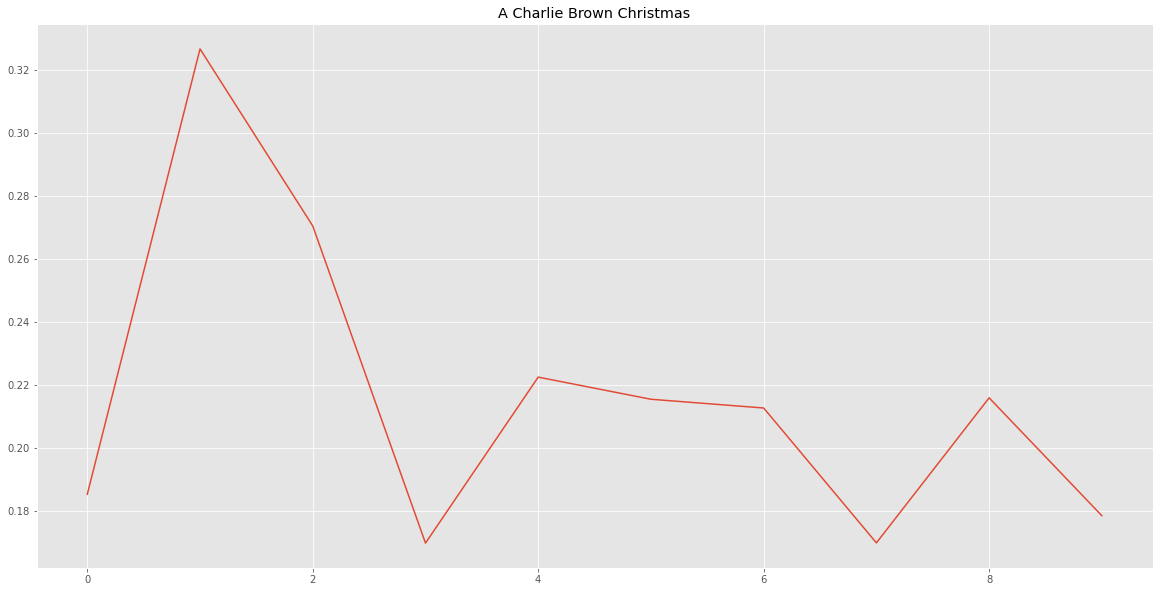

In [194]:
# Show the plot for one movie
plt.plot(polarity_reviews[0])
plt.title(data['full_movienames'].index[0])
plt.show()

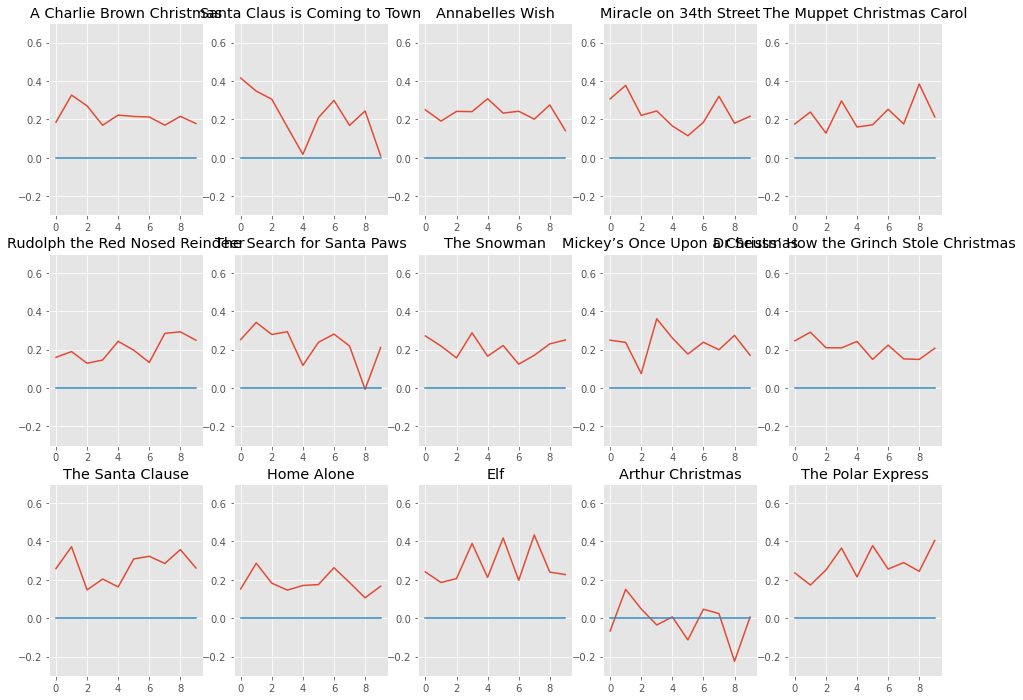

In [195]:
# Show the plot for all movies
plt.rcParams['figure.figsize'] = [16, 12]

for index, movies in enumerate(data.index):    
    plt.subplot(3, 5, index+1)
    plt.plot(polarity_reviews[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_movienames'][index])
    plt.ylim(ymin=-.3, ymax=.7)
    
plt.show()

In [ ]:
# Topic Modeling - Attempt #1 (All Text)

In [1]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

data = pd.read_pickle('dtm_stop1.pkl')
data

,aa,aardman,aardmans,abandon,abandoned,abandoning,abandonment,abc,abilities,ability,...,zemeckiss,zemekis,zero,zillions,zoe,zoey,zombies,zone,zones,zooey
A Charlie Brown Christmas,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Annabelles Wish,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Arthur Christmas,0,16,2,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
Dr Seuss’ How the Grinch Stole Christmas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Elf,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,0,0,0,8
Home Alone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mickey’s Once Upon a Christmas,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Miracle on 34th Street,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Rudolph the Red Nosed Reindeer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Santa Claus is Coming to Town,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Import the necessary modules for LDA with gensim
from gensim import matutils, models
import scipy.sparse
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,A Charlie Brown Christmas,Annabelles Wish,Arthur Christmas,Dr Seuss’ How the Grinch Stole Christmas,Elf,Home Alone,Mickey’s Once Upon a Christmas,Miracle on 34th Street,Rudolph the Red Nosed Reindeer,Santa Claus is Coming to Town,The Muppet Christmas Carol,The Polar Express,The Santa Clause,The Search for Santa Paws,The Snowman
aa,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
aardman,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0
aardmans,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
abandon,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
abandoned,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [5]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [7]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv = pickle.load(open("cv_stop1.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [8]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

2020-11-19 11:10:52,834 : INFO : using symmetric alpha at 0.5
2020-11-19 11:10:52,838 : INFO : using symmetric eta at 0.5
2020-11-19 11:10:52,840 : INFO : using serial LDA version on this node
2020-11-19 11:10:52,844 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 15 documents, updating model once every 15 documents, evaluating perplexity every 15 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-19 11:10:53,750 : INFO : -9.472 per-word bound, 710.1 perplexity estimate based on a held-out corpus of 15 documents with 32107 words
2020-11-19 11:10:53,752 : INFO : PROGRESS: pass 0, at document #15/15
2020-11-19 11:10:53,823 : INFO : topic #0 (0.500): 0.004*"watch" + 0.004*"best" + 0.004*"family" + 0.003*"classic" + 0.003*"little" + 0.003*"holiday" + 0.003*"snowman" + 0.003*"animation" + 0.003*"kids" + 0.003*"version"
2020-11-19 11:10:53,824 : INFO : topic #1 (0.500): 0.004*"family" + 0.004*"little" + 0.003*"year" + 

[(0,
  '0.006*"family" + 0.005*"arthur" + 0.004*"watch" + 0.004*"snowman" + 0.004*"home" + 0.004*"elf" + 0.003*"fun" + 0.003*"little" + 0.003*"funny" + 0.003*"best"'),
 (1,
  '0.004*"version" + 0.004*"charlie" + 0.004*"special" + 0.004*"little" + 0.004*"rudolph" + 0.004*"brown" + 0.004*"characters" + 0.003*"children" + 0.003*"kids" + 0.003*"claus"')]

In [9]:
# LDA for num_topics = 3
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

2020-11-19 11:11:37,120 : INFO : using symmetric alpha at 0.3333333333333333
2020-11-19 11:11:37,120 : INFO : using symmetric eta at 0.3333333333333333
2020-11-19 11:11:37,120 : INFO : using serial LDA version on this node
2020-11-19 11:11:37,120 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 15 documents, updating model once every 15 documents, evaluating perplexity every 15 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-19 11:11:37,385 : INFO : -9.699 per-word bound, 831.3 perplexity estimate based on a held-out corpus of 15 documents with 32107 words
2020-11-19 11:11:37,385 : INFO : PROGRESS: pass 0, at document #15/15
2020-11-19 11:11:37,471 : INFO : topic #0 (0.333): 0.004*"charlie" + 0.004*"characters" + 0.004*"love" + 0.003*"watch" + 0.003*"special" + 0.003*"little" + 0.003*"classic" + 0.003*"best" + 0.003*"version" + 0.003*"kids"
2020-11-19 11:11:37,471 : INFO : topic #1 (0.333): 0.004*"family" + 0.0

[(0,
  '0.009*"charlie" + 0.008*"brown" + 0.004*"characters" + 0.004*"boy" + 0.004*"express" + 0.004*"polar" + 0.004*"special" + 0.004*"animation" + 0.003*"train" + 0.003*"kids"'),
 (1,
  '0.006*"rudolph" + 0.005*"elf" + 0.004*"watch" + 0.004*"love" + 0.004*"classic" + 0.004*"claus" + 0.004*"family" + 0.004*"best" + 0.004*"special" + 0.003*"year"'),
 (2,
  '0.006*"family" + 0.005*"arthur" + 0.004*"snowman" + 0.004*"home" + 0.004*"little" + 0.004*"version" + 0.004*"watch" + 0.004*"old" + 0.003*"best" + 0.003*"children"')]

In [10]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

2020-11-19 11:11:46,172 : INFO : using symmetric alpha at 0.25
2020-11-19 11:11:46,173 : INFO : using symmetric eta at 0.25
2020-11-19 11:11:46,175 : INFO : using serial LDA version on this node
2020-11-19 11:11:46,179 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 15 documents, updating model once every 15 documents, evaluating perplexity every 15 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-19 11:11:46,461 : INFO : -9.964 per-word bound, 998.7 perplexity estimate based on a held-out corpus of 15 documents with 32107 words
2020-11-19 11:11:46,462 : INFO : PROGRESS: pass 0, at document #15/15
2020-11-19 11:11:46,534 : INFO : topic #0 (0.250): 0.004*"family" + 0.004*"watch" + 0.004*"little" + 0.003*"claus" + 0.003*"year" + 0.003*"best" + 0.003*"movies" + 0.003*"animation" + 0.003*"old" + 0.003*"characters"
2020-11-19 11:11:46,536 : INFO : topic #1 (0.250): 0.005*"family" + 0.004*"watch" + 0.004*"little" + 0

[(0,
  '0.006*"annabelle" + 0.005*"billy" + 0.004*"reindeer" + 0.004*"annabelles" + 0.003*"watch" + 0.003*"wish" + 0.003*"kids" + 0.003*"boy" + 0.003*"children" + 0.003*"young"'),
 (1,
  '0.008*"family" + 0.007*"home" + 0.006*"kevin" + 0.004*"movies" + 0.004*"little" + 0.004*"watch" + 0.004*"year" + 0.004*"kids" + 0.003*"old" + 0.003*"disney"'),
 (2,
  '0.006*"snowman" + 0.006*"version" + 0.005*"rudolph" + 0.005*"watch" + 0.004*"elf" + 0.004*"claus" + 0.004*"little" + 0.004*"special" + 0.004*"love" + 0.004*"best"'),
 (3,
  '0.007*"arthur" + 0.006*"charlie" + 0.006*"brown" + 0.005*"characters" + 0.004*"animation" + 0.004*"best" + 0.004*"little" + 0.003*"express" + 0.003*"polar" + 0.003*"children"')]

In [12]:
# Topic Modeling - Attempt #2 (Nouns Only)

In [23]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [25]:
# Read in the cleaned data, before the CountVectorizer step
data_clean = pd.read_pickle('data_clean1.pkl')
data_clean

,reviews
A Charlie Brown Christmas,i remember the first time that i saw this cart...
Annabelles Wish,my mom bought this several years ago on vhs i ...
Arthur Christmas,the test of a film like this is whether you ca...
Dr Seuss’ How the Grinch Stole Christmas,well i finally broke down and went to see it ...
Elf,this is the kind of christmas movie you should...
Home Alone,oh come on imdb users how could this film get ...
Mickey’s Once Upon a Christmas,this here is an anthology that tells magical ...
Miracle on 34th Street,with all of the comments about this version no...
Rudolph the Red Nosed Reindeer,there are many christmas specials and movies i...
Santa Claus is Coming to Town,this is my favorite of all the rankinbass spec...


In [26]:
# Apply the nouns function to the reviews to filter only on nouns
data_nouns = pd.DataFrame(data_clean.reviews.apply(nouns))
data_nouns

,reviews
A Charlie Brown Christmas,time i cartoon i years i peanuts strips i time...
Annabelles Wish,mom years vhs i cartoon jerker years anyone pe...
Arthur Christmas,test film presence writers directors treat pla...
Dr Seuss’ How the Grinch Stole Christmas,pans movie scrooge dickens life jim carrey fee...
Elf,kind christmas movie apart usuals story childl...
Home Alone,imdb users film kids movie i plenty adultsnot ...
Mickey’s Once Upon a Christmas,anthology stories christmas tale tells donald ...
Miracle on 34th Street,comments version one version storymaybe i hart...
Rudolph the Red Nosed Reindeer,specials movies christmas reindeer king christ...
Santa Claus is Coming to Town,rankinbass specials people cartoons try one ru...


In [28]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.reviews)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aardman,aardmans,abandonment,abc,abilities,ability,abilityfielder,abrogation,academy,accent,...,zemeckishanks,zemeckiss,zemekis,zero,zillions,zoe,zombies,zone,zones,zooey
A Charlie Brown Christmas,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Annabelles Wish,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arthur Christmas,7,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
Dr Seuss’ How the Grinch Stole Christmas,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
Elf,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7
Home Alone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mickey’s Once Upon a Christmas,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Miracle on 34th Street,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rudolph the Red Nosed Reindeer,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Santa Claus is Coming to Town,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [30]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

2020-11-19 11:17:43,364 : INFO : using symmetric alpha at 0.5
2020-11-19 11:17:43,365 : INFO : using symmetric eta at 0.5
2020-11-19 11:17:43,371 : INFO : using serial LDA version on this node
2020-11-19 11:17:43,374 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 15 documents, updating model once every 15 documents, evaluating perplexity every 15 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-19 11:17:43,527 : INFO : -8.878 per-word bound, 470.4 perplexity estimate based on a held-out corpus of 15 documents with 17780 words
2020-11-19 11:17:43,528 : INFO : PROGRESS: pass 0, at document #15/15
2020-11-19 11:17:43,572 : INFO : topic #0 (0.500): 0.022*"movie" + 0.021*"film" + 0.018*"christmas" + 0.009*"story" + 0.009*"santa" + 0.006*"family" + 0.005*"character" + 0.005*"characters" + 0.005*"boy" + 0.004*"year"
2020-11-19 11:17:43,574 : INFO : topic #1 (0.500): 0.037*"christmas" + 0.023*"movie" + 0.017*"film" + 

[(0,
  '0.023*"christmas" + 0.021*"movie" + 0.020*"film" + 0.011*"story" + 0.009*"santa" + 0.006*"characters" + 0.006*"character" + 0.006*"elf" + 0.005*"boy" + 0.005*"family"'),
 (1,
  '0.035*"christmas" + 0.024*"movie" + 0.018*"film" + 0.011*"story" + 0.010*"santa" + 0.008*"family" + 0.007*"version" + 0.006*"year" + 0.005*"claus" + 0.005*"children"')]

In [31]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

2020-11-19 11:17:53,098 : INFO : using symmetric alpha at 0.3333333333333333
2020-11-19 11:17:53,098 : INFO : using symmetric eta at 0.3333333333333333
2020-11-19 11:17:53,098 : INFO : using serial LDA version on this node
2020-11-19 11:17:53,098 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 15 documents, updating model once every 15 documents, evaluating perplexity every 15 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-19 11:17:53,254 : INFO : -9.102 per-word bound, 549.4 perplexity estimate based on a held-out corpus of 15 documents with 17780 words
2020-11-19 11:17:53,254 : INFO : PROGRESS: pass 0, at document #15/15
2020-11-19 11:17:53,285 : INFO : topic #0 (0.333): 0.026*"christmas" + 0.019*"movie" + 0.015*"film" + 0.011*"story" + 0.008*"santa" + 0.006*"kids" + 0.006*"holiday" + 0.005*"children" + 0.005*"version" + 0.005*"characters"
2020-11-19 11:17:53,285 : INFO : topic #1 (0.333): 0.029*"movie" + 0

[(0,
  '0.021*"movie" + 0.017*"film" + 0.015*"christmas" + 0.013*"version" + 0.009*"story" + 0.008*"characters" + 0.008*"express" + 0.007*"boy" + 0.006*"train" + 0.006*"santa"'),
 (1,
  '0.029*"movie" + 0.016*"santa" + 0.011*"christmas" + 0.009*"film" + 0.008*"children" + 0.008*"kids" + 0.007*"dog" + 0.006*"year" + 0.005*"buddies" + 0.005*"incinerator"'),
 (2,
  '0.039*"christmas" + 0.022*"movie" + 0.021*"film" + 0.013*"story" + 0.010*"santa" + 0.009*"family" + 0.006*"year" + 0.005*"snowman" + 0.005*"holiday" + 0.005*"animation"')]

In [32]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

2020-11-19 11:18:05,479 : INFO : using symmetric alpha at 0.25
2020-11-19 11:18:05,480 : INFO : using symmetric eta at 0.25
2020-11-19 11:18:05,481 : INFO : using serial LDA version on this node
2020-11-19 11:18:05,484 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 15 documents, updating model once every 15 documents, evaluating perplexity every 15 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-19 11:18:05,629 : INFO : -9.370 per-word bound, 661.7 perplexity estimate based on a held-out corpus of 15 documents with 17780 words
2020-11-19 11:18:05,630 : INFO : PROGRESS: pass 0, at document #15/15
2020-11-19 11:18:05,674 : INFO : topic #0 (0.250): 0.030*"christmas" + 0.023*"movie" + 0.018*"film" + 0.013*"santa" + 0.011*"story" + 0.007*"family" + 0.006*"claus" + 0.006*"year" + 0.005*"version" + 0.005*"characters"
2020-11-19 11:18:05,675 : INFO : topic #1 (0.250): 0.029*"christmas" + 0.026*"movie" + 0.025*"film" 

[(0,
  '0.023*"movie" + 0.021*"santa" + 0.019*"christmas" + 0.014*"claus" + 0.010*"year" + 0.009*"kids" + 0.007*"children" + 0.007*"specials" + 0.007*"town" + 0.007*"film"'),
 (1,
  '0.027*"movie" + 0.026*"film" + 0.025*"christmas" + 0.011*"story" + 0.010*"family" + 0.009*"santa" + 0.008*"version" + 0.007*"home" + 0.006*"characters" + 0.006*"character"'),
 (2,
  '0.032*"christmas" + 0.021*"snowman" + 0.014*"charlie" + 0.012*"film" + 0.008*"story" + 0.008*"animation" + 0.008*"boy" + 0.007*"cartoon" + 0.006*"life" + 0.006*"meaning"'),
 (3,
  '0.046*"christmas" + 0.026*"movie" + 0.016*"film" + 0.016*"story" + 0.011*"arthur" + 0.009*"santa" + 0.007*"characters" + 0.007*"animation" + 0.007*"family" + 0.006*"muppet"')]

In [33]:
# Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [34]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [35]:
# Apply the nouns function to the reviews to filter only on nouns
data_nouns_adj = pd.DataFrame(data_clean.reviews.apply(nouns_adj))
data_nouns_adj

,reviews
A Charlie Brown Christmas,i first time i cartoon i years old i peanuts c...
Annabelles Wish,mom several years vhs i cartoon tear jerker se...
Arthur Christmas,test film presence writers directors surprised...
Dr Seuss’ How the Grinch Stole Christmas,hesitant pans great movie original more scroog...
Elf,kind christmas movie december apart usuals won...
Home Alone,imdb users film kids movie i plenty adultsnot ...
Mickey’s Once Upon a Christmas,anthology magical stories christmas first tale...
Miracle on 34th Street,comments version original one favorite version...
Rudolph the Red Nosed Reindeer,many christmas specials movies christmas good ...
Santa Claus is Coming to Town,favorite rankinbass specials excellent many pe...


In [37]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.reviews)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aa,aardman,aardmans,abandonment,abc,abilities,ability,abilityfielder,abominable,abonimable,...,zemeckiss,zemekis,zero,zillions,zoe,zoey,zombies,zone,zones,zooey
A Charlie Brown Christmas,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Annabelles Wish,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arthur Christmas,0,15,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
Dr Seuss’ How the Grinch Stole Christmas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Elf,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,8
Home Alone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mickey’s Once Upon a Christmas,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Miracle on 34th Street,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Rudolph the Red Nosed Reindeer,0,0,0,0,0,0,0,0,5,1,...,0,0,0,0,0,0,0,0,0,0
Santa Claus is Coming to Town,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [39]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

2020-11-19 11:19:30,793 : INFO : using symmetric alpha at 0.5
2020-11-19 11:19:30,794 : INFO : using symmetric eta at 0.5
2020-11-19 11:19:30,795 : INFO : using serial LDA version on this node
2020-11-19 11:19:30,798 : INFO : running online (multi-pass) LDA training, 2 topics, 10 passes over the supplied corpus of 15 documents, updating model once every 15 documents, evaluating perplexity every 15 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-19 11:19:30,980 : INFO : -9.175 per-word bound, 577.9 perplexity estimate based on a held-out corpus of 15 documents with 18013 words
2020-11-19 11:19:30,981 : INFO : PROGRESS: pass 0, at document #15/15
2020-11-19 11:19:31,020 : INFO : topic #0 (0.500): 0.005*"home" + 0.004*"charlie" + 0.004*"boy" + 0.004*"snowman" + 0.004*"brown" + 0.004*"animation" + 0.003*"rudolph" + 0.003*"elf" + 0.003*"version" + 0.003*"north"
2020-11-19 11:19:31,020 : INFO : topic #1 (0.500): 0.006*"version" + 0.005*"animation" + 0.004*"arthur" +

[(0,
  '0.007*"snowman" + 0.006*"home" + 0.006*"charlie" + 0.005*"brown" + 0.004*"elf" + 0.004*"rudolph" + 0.004*"boy" + 0.003*"animation" + 0.003*"kevin" + 0.003*"muppet"'),
 (1,
  '0.007*"version" + 0.006*"arthur" + 0.006*"animation" + 0.004*"boy" + 0.004*"polar" + 0.004*"grinch" + 0.004*"express" + 0.003*"book" + 0.003*"mickey" + 0.003*"train"')]

In [40]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

2020-11-19 11:19:40,136 : INFO : using symmetric alpha at 0.3333333333333333
2020-11-19 11:19:40,137 : INFO : using symmetric eta at 0.3333333333333333
2020-11-19 11:19:40,138 : INFO : using serial LDA version on this node
2020-11-19 11:19:40,141 : INFO : running online (multi-pass) LDA training, 3 topics, 10 passes over the supplied corpus of 15 documents, updating model once every 15 documents, evaluating perplexity every 15 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-19 11:19:40,318 : INFO : -9.450 per-word bound, 699.6 perplexity estimate based on a held-out corpus of 15 documents with 18013 words
2020-11-19 11:19:40,319 : INFO : PROGRESS: pass 0, at document #15/15
2020-11-19 11:19:40,369 : INFO : topic #0 (0.333): 0.006*"snowman" + 0.006*"boy" + 0.005*"animation" + 0.005*"version" + 0.004*"arthur" + 0.004*"polar" + 0.004*"north" + 0.003*"cartoon" + 0.003*"book" + 0.003*"night"
2020-11-19 11:19:40,370 : INFO : topic #1 (0.333): 0.006*"version" + 0.004

[(0,
  '0.009*"snowman" + 0.008*"animation" + 0.008*"arthur" + 0.007*"boy" + 0.005*"rudolph" + 0.005*"north" + 0.005*"reindeer" + 0.005*"pole" + 0.004*"polar" + 0.004*"song"'),
 (1,
  '0.013*"version" + 0.006*"muppet" + 0.006*"scrooge" + 0.005*"disney" + 0.005*"cabot" + 0.005*"carol" + 0.004*"mickey" + 0.004*"muppets" + 0.004*"stories" + 0.003*"mean"'),
 (2,
  '0.009*"charlie" + 0.008*"home" + 0.007*"brown" + 0.005*"kevin" + 0.005*"grinch" + 0.005*"elf" + 0.004*"house" + 0.004*"carrey" + 0.003*"scott" + 0.003*"tim"')]

In [41]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

2020-11-19 11:19:48,352 : INFO : using symmetric alpha at 0.25
2020-11-19 11:19:48,352 : INFO : using symmetric eta at 0.25
2020-11-19 11:19:48,352 : INFO : using serial LDA version on this node
2020-11-19 11:19:48,352 : INFO : running online (multi-pass) LDA training, 4 topics, 10 passes over the supplied corpus of 15 documents, updating model once every 15 documents, evaluating perplexity every 15 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-19 11:19:48,539 : INFO : -9.783 per-word bound, 880.7 perplexity estimate based on a held-out corpus of 15 documents with 18013 words
2020-11-19 11:19:48,539 : INFO : PROGRESS: pass 0, at document #15/15
2020-11-19 11:19:48,602 : INFO : topic #0 (0.250): 0.006*"animation" + 0.005*"arthur" + 0.003*"rudolph" + 0.003*"reindeer" + 0.003*"version" + 0.003*"boy" + 0.003*"home" + 0.003*"snowman" + 0.003*"grinch" + 0.003*"north"
2020-11-19 11:19:48,602 : INFO : topic #1 (0.250): 0.007*"version" + 0.004*"boy" + 0.004*"snowman"

[(0,
  '0.008*"arthur" + 0.005*"rudolph" + 0.005*"animation" + 0.004*"reindeer" + 0.004*"muppet" + 0.004*"grinch" + 0.004*"scrooge" + 0.004*"son" + 0.004*"mickey" + 0.004*"songs"'),
 (1,
  '0.017*"version" + 0.008*"cabot" + 0.005*"david" + 0.005*"mean" + 0.005*"sebastian" + 0.005*"hartman" + 0.005*"dog" + 0.004*"kringle" + 0.004*"cute" + 0.003*"buddies"'),
 (2,
  '0.015*"snowman" + 0.013*"boy" + 0.009*"animation" + 0.008*"polar" + 0.008*"express" + 0.006*"train" + 0.006*"north" + 0.006*"book" + 0.006*"pole" + 0.005*"hanks"'),
 (3,
  '0.011*"charlie" + 0.011*"home" + 0.010*"brown" + 0.007*"kevin" + 0.006*"elf" + 0.005*"house" + 0.004*"buddy" + 0.004*"john" + 0.004*"meaning" + 0.004*"peanuts"')]

In [42]:
# Identify Topics in Each Document

In [43]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

2020-11-19 11:20:13,875 : INFO : using symmetric alpha at 0.25
2020-11-19 11:20:13,875 : INFO : using symmetric eta at 0.25
2020-11-19 11:20:13,891 : INFO : using serial LDA version on this node
2020-11-19 11:20:13,891 : INFO : running online (multi-pass) LDA training, 4 topics, 80 passes over the supplied corpus of 15 documents, updating model once every 15 documents, evaluating perplexity every 15 documents, iterating 50x with a convergence threshold of 0.001000
2020-11-19 11:20:14,062 : INFO : -9.781 per-word bound, 879.7 perplexity estimate based on a held-out corpus of 15 documents with 18013 words
2020-11-19 11:20:14,062 : INFO : PROGRESS: pass 0, at document #15/15
2020-11-19 11:20:14,125 : INFO : topic #0 (0.250): 0.004*"home" + 0.003*"version" + 0.003*"song" + 0.003*"specials" + 0.003*"charlie" + 0.003*"boy" + 0.003*"grinch" + 0.003*"animation" + 0.003*"elf" + 0.003*"north"
2020-11-19 11:20:14,125 : INFO : topic #1 (0.250): 0.006*"snowman" + 0.006*"animation" + 0.005*"version"

[(0,
  '0.009*"grinch" + 0.006*"carrey" + 0.006*"scott" + 0.006*"tim" + 0.006*"town" + 0.006*"specials" + 0.005*"allen" + 0.005*"astaire" + 0.004*"clause" + 0.004*"cartoon"'),
 (1,
  '0.007*"rudolph" + 0.007*"elf" + 0.007*"muppet" + 0.006*"scrooge" + 0.005*"carol" + 0.004*"reindeer" + 0.004*"mickey" + 0.004*"version" + 0.004*"disney" + 0.004*"songs"'),
 (2,
  '0.009*"snowman" + 0.008*"arthur" + 0.008*"boy" + 0.008*"home" + 0.007*"animation" + 0.005*"north" + 0.005*"polar" + 0.005*"pole" + 0.005*"express" + 0.004*"kevin"'),
 (3,
  '0.014*"version" + 0.013*"charlie" + 0.012*"brown" + 0.006*"cabot" + 0.004*"peanuts" + 0.004*"meaning" + 0.004*"david" + 0.004*"tree" + 0.004*"television" + 0.004*"sebastian"')]

In [44]:
# Let's take a look at which topics each review contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(3, 'A Charlie Brown Christmas'),
 (3, 'Annabelles Wish'),
 (2, 'Arthur Christmas'),
 (0, 'Dr Seuss’ How the Grinch Stole Christmas'),
 (1, 'Elf'),
 (2, 'Home Alone'),
 (1, 'Mickey’s Once Upon a Christmas'),
 (3, 'Miracle on 34th Street'),
 (1, 'Rudolph the Red Nosed Reindeer'),
 (0, 'Santa Claus is Coming to Town'),
 (1, 'The Muppet Christmas Carol'),
 (2, 'The Polar Express'),
 (0, 'The Santa Clause'),
 (2, 'The Search for Santa Paws'),
 (2, 'The Snowman')]